# Analisis Penggunaan Jalur Sepeda di Montreal Tahun 2015

## Gambaran Umum

[Dataset](https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes/data) yang digunakan dalam analisis ini berisi informasi tentang jumlah sepeda yang menggunakan berbagai jalur sepeda di Montreal sepanjang tahun 2015. Setiap baris data mencatat jumlah sepeda yang melewati jalur tertentu pada tanggal dan jam tertentu.

## Tujuan Analisis

Tujuan utama dari analisis ini adalah untuk memodelkan dan memprediksi jumlah sepeda yang menggunakan jalur sepeda `Berri1` berdasarkan jumlah sepeda yang menggunakan jalur-jalur sepeda lainnya. Metode yang digunakan adalah regresi Poisson, yang cocok untuk memodelkan data count seperti jumlah sepeda.

## Langkah-langkah Analisis

Preprocessing Data:

- Mengimpor dataset dan memastikan format tanggal sesuai.
- Melakukan pengisian nilai yang hilang jika ada.

Model Regresi Poisson:

- Membuat model regresi Poisson dengan menggunakan paket statsmodels.
- Menambahkan variabel-variabel independen yang relevan, seperti jumlah sepeda yang melewati jalur-jalur lain.

Evaluasi Model:

- Mengevaluasi performa model menggunakan statistik model seperti deviance dan residual deviance.
- Menganalisis koefisien regresi untuk memahami dampak setiap variabel independen terhadap jumlah sepeda di jalur Berri1.

Visualisasi Hasil:

- Memvisualisasikan distribusi data jumlah sepeda.
- Memplot nilai prediksi versus nilai aktual untuk mengevaluasi akurasi model.
- Menampilkan distribusi residual untuk memeriksa asumsi model.

Analisis ini diharapkan dapat memberikan wawasan tentang faktor-faktor yang mempengaruhi penggunaan jalur sepeda di Montreal, serta memberikan prediksi yang akurat terkait dengan jumlah sepeda yang akan menggunakan jalur Berri1 berdasarkan data historis yang tersedia.

## Proses Analisis

#### [1] Import Library, Dataset, dan Preprocessing

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
file_path = 'comptagesvelo2015.csv'
data = pd.read_csv(file_path)

# Mengubah kolom 'Date' menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Mengisi nilai yang hilang dengan 0 atau metode lain yang sesuai
data.fillna(0, inplace=True)

# Melihat sekilas dataset
data.head()

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,2015-01-01,00:00,58,12,4,17,33.0,49,21,16,...,0.0,58,91,24,3,0.0,17,78,21,6
1,2015-01-02,00:00,75,7,5,15,30.0,113,27,9,...,0.0,109,177,32,13,0.0,11,57,77,4
2,2015-01-03,00:00,79,7,3,7,30.0,107,36,12,...,0.0,71,131,33,5,0.0,14,174,40,5
3,2015-01-04,00:00,10,1,21,0,10.0,35,29,1,...,0.0,6,11,6,1,0.0,1,20,6,0
4,2015-01-05,00:00,42,0,2,0,27.0,90,21,1,...,0.0,0,5,49,20,0.0,0,41,56,10


#### [2] Pemahaman Data (Data Understanding)

##### [2.1] Deskripsi Dataset

Data tersebut adalah dataset harian tentang jumlah sepeda yang menggunakan berbagai jalur sepeda di Montreal selama bulan Januari 2015.

##### [2.2] Kolom dalam Dataset

Dataset ini terdiri dari beberapa kolom sebagai berikut:

`Tanggal (Date)`: Data mencakup periode mulai dari tanggal 1 Januari 2015 hingga 5 Januari 2015. Setiap baris mewakili satu hari dalam dataset.

`Variabel Jumlah Sepeda (Berri1 dan lainnya)`: Setiap kolom, seperti Berri1, Boyer, Brébeuf, dll., mewakili jumlah sepeda yang melewati jalur sepeda tersebut pada hari yang bersangkutan.
Data ini menunjukkan pola harian penggunaan berbagai jalur sepeda di Montreal.

##### [2.3] Data yang Hilang:

Beberapa kolom memiliki nilai yang hilang (missing values), ditunjukkan dengan cel kosong (,).
Nilai-nilai ini perlu diperiksa dan diperlakukan secara khusus saat pra-pemrosesan data sebelum membangun model.

##### [2.4] Format Waktu (Time):

Data waktu (00:00) menunjukkan waktu pengumpulan data harian.
Meskipun waktu disertakan, analisis ini lebih fokus pada pola harian daripada pola jam.

##### [2.5] Variasi dalam Jumlah Sepeda:

Terdapat variasi yang signifikan dalam jumlah sepeda yang melewati jalur-jalur sepeda berbeda setiap hari.
Beberapa jalur seperti Maisonneuve_2 dan Rachel / Papineau memiliki jumlah sepeda yang sangat tinggi pada beberapa hari tertentu, sedangkan yang lainnya seperti Pont_Jacques_Cartier memiliki jumlah yang lebih rendah atau bahkan nol pada beberapa hari.

#### [3] Memilih kolom yang relevan untuk analisis

In [35]:
# Misalnya kita akan memodelkan jumlah sepeda di jalur 'Berri1'
features = ['Berri1', 'Boyer', 'Brébeuf', 'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 
            'Maisonneuve_2', 'Maisonneuve_3', 'Notre-Dame', 'Parc', 'PierDup', 
            'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau', 
            'René-Lévesque', 'Saint-Antoine', 'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger']
target = 'Berri1'

# Membuat dataframe untuk fitur dan target
X = data[features]
y = data[target]

#### [4] Membuat model dengan regresi poisson

In [36]:
import statsmodels.api as sm

# Menambahkan intercept ke model
X = sm.add_constant(X)

# Membuat model regresi Poisson
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Menampilkan ringkasan hasil
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Berri1   No. Observations:                  319
Model:                            GLM   Df Residuals:                      299
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23316.
Date:                Sat, 22 Jun 2024   Deviance:                       43717.
Time:                        16:07:35   Pearson chi2:                 3.84e+04
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

---
---

**Penjelasan Hasil Regresi Poisson**

---

**Model Statistik**

- `Model`: Generalized Linear Model (GLM) dengan distribusi Poisson.
- `Jumlah Pengamatan`: 319
- `Derajat Kebebasan Residual`: 299
- `Metode Estimasi`: Iteratively Reweighted Least Squares (IRLS)
- `Likelihood`: Log-Likelihood = -23316
- `Deviance`: 43717
- `Chi-squared (Pearson)`: 3.84e+04
- `Pseudo R-squared (CS)`: 1.000 (Indikasi bahwa model sesuai dengan data dengan sangat baik)

**Parameter Estimasi (coef) dan Signifikansi**

- `const`: Konstanta model, diestimasi sebesar 6.4583 dengan tingkat signifikansi yang sangat tinggi (P-value < 0.001). Ini adalah baseline atau intercept dari model.
- `Berri1`: Koefisien positif sebesar 0.0002, dengan P-value < 0.001. Menunjukkan bahwa jumlah sepeda di jalur Berri1 memiliki pengaruh signifikan terhadap dirinya sendiri.
- `Variabel lainnya (seperti Boyer, Brébeuf, Maisonneuve_1, dll.)`: Masing-masing memiliki koefisien yang berbeda-beda, yang mengindikasikan pengaruhnya terhadap jumlah sepeda di jalur Berri1.
- `PierDup`: Koefisien yang mendekati nol (-6.057e-06) dengan P-value sekitar 0.056. Ini menunjukkan bahwa variabel ini mungkin tidak signifikan secara statistik dalam mempengaruhi jumlah sepeda di jalur Berri1 pada tingkat kepercayaan yang tinggi (α = 0.05).

**Interpretasi**

- Model ini secara keseluruhan memiliki Pseudo R-squared yang sangat tinggi (1.000), yang mengindikasikan bahwa model mampu menjelaskan variasi dalam data dengan sangat baik.
- Variabel-variabel yang memiliki koefisien positif (seperti Maisonneuve_2, Maisonneuve_3, Totem_Laurier) berkontribusi positif terhadap jumlah sepeda di jalur Berri1.
- Variabel dengan koefisien negatif (seperti Maisonneuve_1, Notre-Dame, University) berkontribusi negatif terhadap jumlah sepeda di jalur Berri1.
- Variabel PierDup memiliki P-value yang mendekati ambang batas (α = 0.05), sehingga interpretasinya perlu dipertimbangkan lebih lanjut terkait signifikansinya dalam model.

In [37]:
# Prediksi menggunakan model
y_pred = results.predict(X)

# Menghitung deviance residuals
deviance_resid = results.resid_deviance

# Menampilkan beberapa nilai prediksi dan deviance residuals
print(y_pred.head())
print(deviance_resid.head())


0    452.538199
1    475.786277
2    475.172268
3    577.518752
4    469.710120
dtype: float64
0   -23.468332
1   -22.900883
2   -22.557843
3   -32.464048
4   -25.546169
dtype: float64


#### [5] Visualisasi distribusi jumlah sepeda pada jalur Berri1

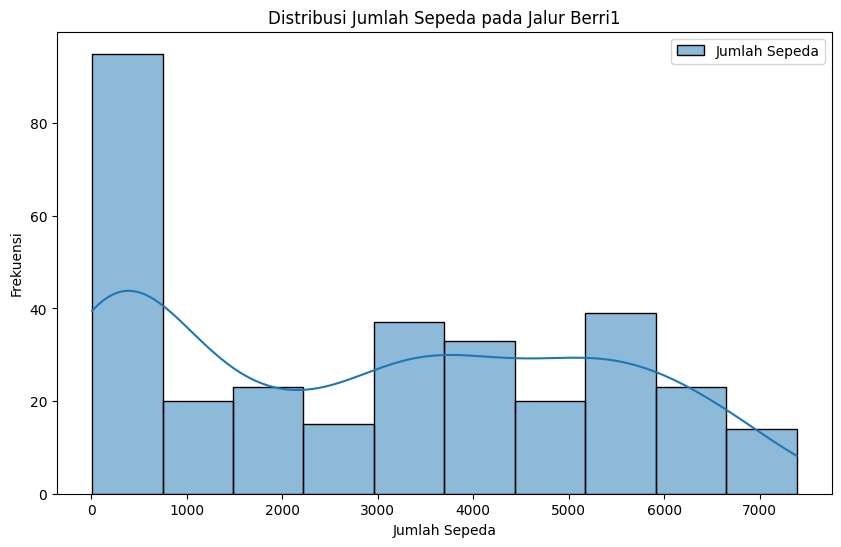

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, label='Jumlah Sepeda')
plt.title('Distribusi Jumlah Sepeda pada Jalur Berri1')
plt.xlabel('Jumlah Sepeda')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

#### [6] Korelasi antar fitur

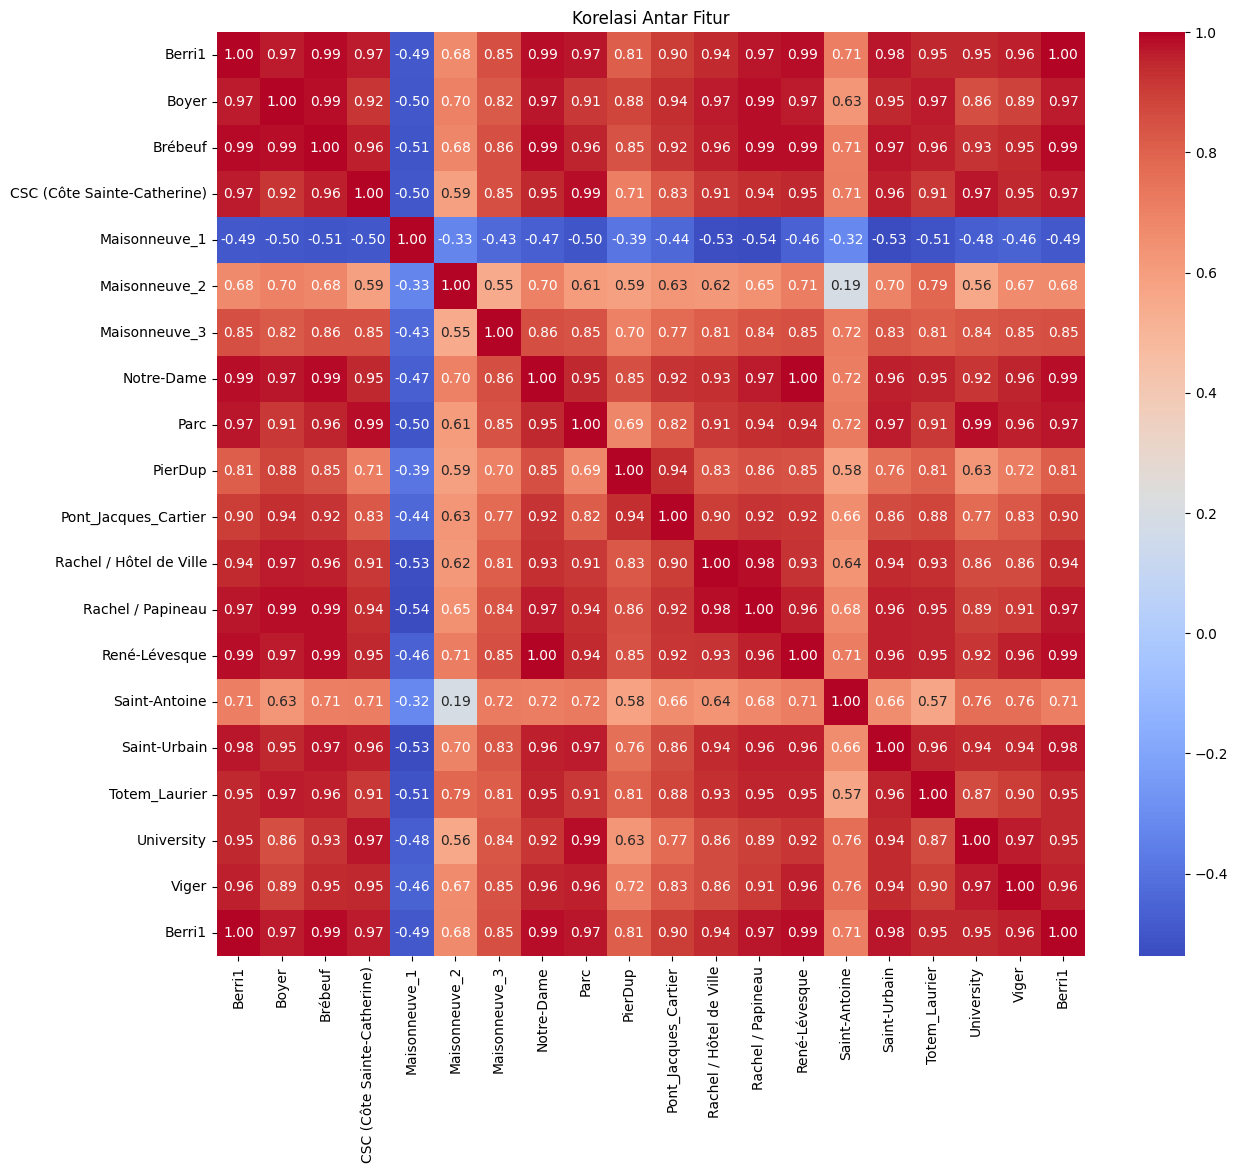

In [39]:
plt.figure(figsize=(14, 12))
corr_matrix = data[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

#### [7] Plot prediksi vs nilai aktual

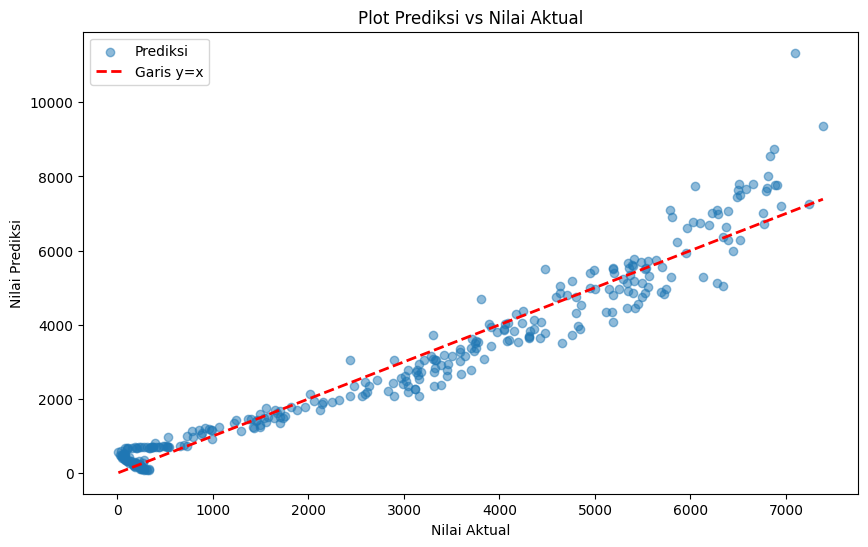

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label='Prediksi')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2, label='Garis y=x')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Plot Prediksi vs Nilai Aktual')
plt.legend()
plt.show()

#### [8] Plot residual

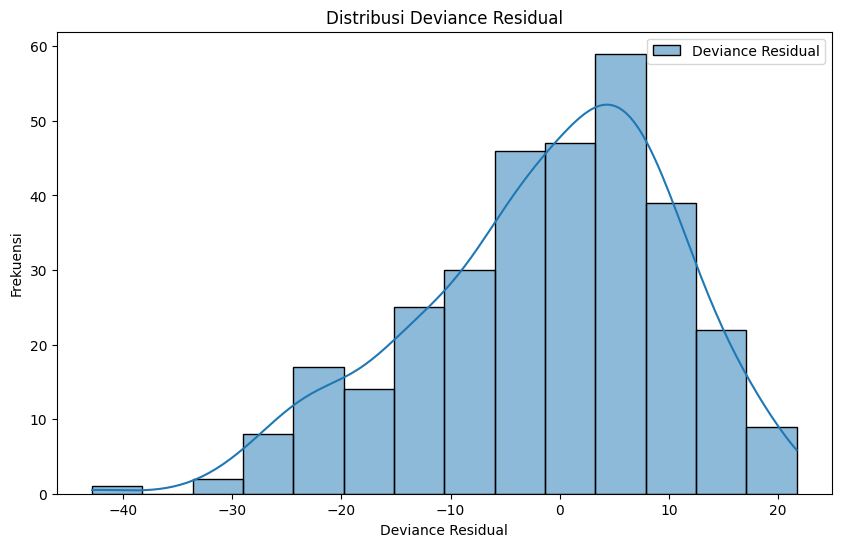

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(deviance_resid, kde=True, label='Deviance Residual')
plt.title('Distribusi Deviance Residual')
plt.xlabel('Deviance Residual')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

## **Kesimpulan**

Hasil ini menunjukkan bahwa model regresi Poisson yang dibangun telah sesuai dengan data dengan sangat baik (Pseudo R-squared = 1.000), dan variabel-variabel yang dimasukkan memiliki pengaruh yang signifikan terhadap jumlah sepeda yang menggunakan jalur `Berri1` di Montreal pada tahun 2015.